<a href="https://colab.research.google.com/github/Anagefilho/UFU_Mestrado/blob/main/Atividade3_Rede_Neural_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <font style="color:black">**Curso de Analytics de Imagens e Vídeos**</font>

Atividade 03 - Classificação de imagens usando RNAs

## **Exemplo prático**

Criação e treinamento de rede neural com Pytorch

In [ ]:
# Importação das bibliotecas

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import cv2

torch.__version__

'1.12.1+cu113'

### Funções auxiliares para a execução

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

### Base de dados

In [ ]:
# Especificando o transformador das imagens para o formato específico do pytorch (média = 0.5 e desvio padrão 0.5)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# baixando o dataset de imagens USPS

# Download and load the training data
trainset = datasets.USPS('.', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.USPS('.', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
# verificando o primeiro registro dos dados (informações de 0 a 255)
trainset.data[0]

array([[  0,   0,   0,   0,   0,   1,  17,  77, 133,  91,  23,   1,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   7,  49, 144, 192, 122,  30,   1,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   4,  30, 107, 197, 193,  91,  18,   1,   0,
          0,   0,   0],
       [  0,   0,   0,   1,  20,  84, 177, 212, 151,  49,   5,   0,   0,
          0,   0,   0],
       [  0,   0,   0,  11,  62, 156, 211, 174,  82,  18,   1,   0,   0,
          0,   0,   0],
       [  0,   0,   7,  46, 132, 204, 187, 101,  29,   5,   4,   8,   7,
          3,   0,   0],
       [  0,   3,  31, 111, 194, 198, 119,  39,  11,  20,  46,  67,  61,
         34,   8,   0],
       [  0,  14,  77, 179, 211, 145,  55,  21,  42,  92, 151, 186, 177,
        117,  36,   3],
       [  2,  37, 137, 215, 188,  82,  30,  60, 128, 180, 202, 219, 231,
        182,  66,   8],
       [  6,  59, 179, 223, 157,  59,  60, 136, 181, 166, 139, 164, 221,
        191,  70,   9],
       [ 11,  77, 198, 227, 16

In [ ]:
# Verificando a quantidade e formato dos dados
trainset.data.shape

(7291, 16, 16)

In [ ]:
# Verificando os valores targets (Classe)
trainset.targets

[6,
 5,
 4,
 7,
 3,
 6,
 3,
 1,
 0,
 1,
 7,
 0,
 1,
 1,
 7,
 7,
 4,
 8,
 0,
 1,
 4,
 8,
 7,
 4,
 8,
 7,
 3,
 7,
 4,
 1,
 3,
 6,
 7,
 4,
 1,
 3,
 7,
 7,
 4,
 5,
 4,
 2,
 7,
 4,
 1,
 3,
 7,
 7,
 4,
 0,
 6,
 3,
 2,
 0,
 8,
 6,
 6,
 2,
 0,
 8,
 7,
 8,
 2,
 0,
 9,
 0,
 2,
 2,
 0,
 8,
 1,
 2,
 0,
 8,
 3,
 3,
 2,
 8,
 2,
 2,
 0,
 8,
 1,
 4,
 4,
 8,
 9,
 8,
 9,
 6,
 7,
 6,
 1,
 9,
 7,
 0,
 8,
 0,
 4,
 6,
 8,
 0,
 0,
 3,
 0,
 8,
 0,
 9,
 0,
 3,
 8,
 0,
 1,
 2,
 2,
 9,
 0,
 6,
 6,
 5,
 9,
 2,
 0,
 9,
 1,
 4,
 1,
 2,
 7,
 1,
 0,
 9,
 0,
 8,
 0,
 7,
 9,
 1,
 3,
 0,
 4,
 4,
 3,
 5,
 1,
 6,
 8,
 5,
 4,
 4,
 6,
 8,
 4,
 4,
 8,
 6,
 4,
 0,
 2,
 3,
 9,
 8,
 6,
 8,
 9,
 3,
 5,
 6,
 8,
 0,
 2,
 2,
 6,
 8,
 4,
 1,
 0,
 2,
 7,
 1,
 0,
 2,
 2,
 7,
 1,
 0,
 9,
 2,
 7,
 0,
 4,
 8,
 0,
 8,
 7,
 2,
 7,
 1,
 3,
 2,
 7,
 3,
 2,
 2,
 2,
 7,
 1,
 0,
 2,
 2,
 8,
 5,
 4,
 2,
 2,
 7,
 8,
 7,
 0,
 2,
 7,
 1,
 0,
 2,
 6,
 0,
 2,
 7,
 6,
 0,
 8,
 2,
 7,
 1,
 1,
 0,
 1,
 7,
 7,
 6,
 4,
 4,
 6,
 2,
 9,
 1,
 1,
 9,
 0,
 3,


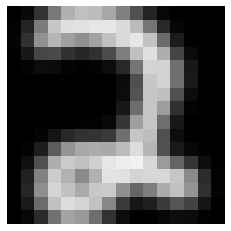

In [ ]:
# Visualizando uma imagem percorrendo o dataloader
# (1, 1, 16, 16)

image, label = next(iter(trainloader))
imshow(image[0,:]);

Label | Description

0 | 0

1 | 1

2 | 2

3 | 3

4 | 4

5 | 5

6 | 6

7 | 7

8 | 8

9 | 9

### Criando uma rede neural

In [ ]:
# Criação da classe queno formato especificado pelo pytorch
# Classifier é o nome escolhido para a o objeto 
# dados de entrada (16x16 = 256)
# RNA totalmente conectada
# saída: 10 classes (0, 1, ... , 9)

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        # Camadas lineares para as conexões
        self.fc1 = nn.Linear(256, 128) # camada intermediaria 1
        self.fc2 = nn.Linear(128, 64) # camada intermediaria 2
        self.fc3 = nn.Linear(64, 32)  # camada intermediaria 3
        self.fc4 = nn.Linear(32, 10)   # camada saída


    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x)) # Aplicação da função relu apos o somatório linear
        x = F.relu(self.fc2(x)) # Aplicação da função relu apos o somatório linear
        x = F.relu(self.fc3(x)) # Aplicação da função relu apos o somatório linear
       # x = F.relu(self.fc4(x)) # Aplicação da função relu apos o somatório linear

        x = self.fc4(x)         # Não é necessário aplicação da função de ativação na última camada, pois iremos calcular as probabilidades com esta saída
        
        return x

In [ ]:
# Criando objeto da estrutura da rede

net = Classifier()
print(net)

Classifier(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [ ]:
# Onde estão os pesos da rede?
# Os pesos estão entre [-1, 1]

print(net.fc1.weight)
print(' ')
print(net.fc1.weight.shape)

Parameter containing:
tensor([[-0.0202,  0.0323,  0.0258,  ...,  0.0577,  0.0130,  0.0581],
        [ 0.0174, -0.0603, -0.0363,  ..., -0.0523, -0.0595,  0.0245],
        [-0.0258, -0.0293, -0.0346,  ...,  0.0334,  0.0330, -0.0607],
        ...,
        [-0.0444, -0.0312, -0.0436,  ..., -0.0570,  0.0297,  0.0082],
        [ 0.0191,  0.0034,  0.0384,  ..., -0.0037,  0.0507, -0.0586],
        [-0.0379,  0.0336,  0.0585,  ...,  0.0561, -0.0455,  0.0410]],
       requires_grad=True)
 
torch.Size([128, 256])


In [ ]:
# Definindo parâmetros importantes do treinamento
#Função de custo e função de otimização dos parâmetros
# Faz-se necessário passar os parâmetros da rede e a taxa de aprendizado (learning rate)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

### Etapa de treinamento

In [ ]:
# verificando disponibilidade da gpu
device = torch.device('cuda') if torch.cuda.is_available else torch.devide('cpu')
device

device(type='cuda')

## Adiciona a rede para a GPU

In [ ]:
net.to(device)

Classifier(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
# Função que define o fluxo de treinamento

def training_loop(loader, epoch):
    running_loss = 0.
    running_accuracy = 0.
    
    # loop interno para pegar os batches de imagens
    for i, data in enumerate(loader):

        # pega os dados de entrada e saida
        inputs, labels = data
                
        # inseri os dados na gpu
        inputs, labels = inputs.to(device), labels.to(device)

        # Zera o gradiente
        optimizer.zero_grad()     

        # Passa as imagens na rede e o resultado é armazenado em outputs
        outputs = net(inputs)

        # Calcula o erro do batch
        loss = criterion(outputs, labels)
        
        # Realiza o backpropagation
        loss.backward()
        
        # Atualiza os pesos
        optimizer.step()

        # Agrupa o erro do batch
        running_loss += loss.item()

        # Calcula a probabilidade com a função softmax
        ps = F.softmax(outputs)

        # Identifica pelo indice a classe com maior probabilidade para comparar com os labels originais 
        top_p, top_class = ps.topk(k = 1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)

        # equals se transforma em um vetor de zeros e ums, logo podemos calcular a acuarcia como abaixo
        accuracy = torch.mean(equals.type(torch.float))

        running_accuracy += accuracy

              
        # Imprimindo os dados referentes a este batch
        #print(f'\rÉpoca {epoch+1:3d} - Batch {i+1:3d} de {len(loader):3d}: perda {loss:03.2f} - acurácia {accuracy:03.2f}')
        
    # Imprimindo os dados referentes a esta época
    print(f'\rÉPOCA {epoch+1:3d} FINALIZADA: perda {running_loss/len(loader):.5f} - acurácia {running_accuracy/len(loader):.5f}')
    print(' ')
    print(' ')

In [ ]:
for epoch in range(15):
  print('Treinando...')
  training_loop(trainloader, epoch)
  print(' ')
  net.eval()
  print('Testando...')
  training_loop(testloader, epoch)
  print(' ')
  net.train()

Treinando...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


ÉPOCA   1 FINALIZADA: perda 2.30329 - acurácia 0.07326
 
 
 
Testando...
ÉPOCA   1 FINALIZADA: perda 2.27862 - acurácia 0.11366
 
 
 
Treinando...
ÉPOCA   2 FINALIZADA: perda 2.24388 - acurácia 0.32276
 
 
 
Testando...
ÉPOCA   2 FINALIZADA: perda 2.19418 - acurácia 0.32023
 
 
 
Treinando...
ÉPOCA   3 FINALIZADA: perda 2.09614 - acurácia 0.29540
 
 
 
Testando...
ÉPOCA   3 FINALIZADA: perda 1.96163 - acurácia 0.30426
 
 
 
Treinando...
ÉPOCA   4 FINALIZADA: perda 1.77418 - acurácia 0.34755
 
 
 
Testando...
ÉPOCA   4 FINALIZADA: perda 1.62506 - acurácia 0.40948
 
 
 
Treinando...
ÉPOCA   5 FINALIZADA: perda 1.43581 - acurácia 0.55808
 
 
 
Testando...
ÉPOCA   5 FINALIZADA: perda 1.31000 - acurácia 0.63593
 
 
 
Treinando...
ÉPOCA   6 FINALIZADA: perda 1.06538 - acurácia 0.72946
 
 
 
Testando...
ÉPOCA   6 FINALIZADA: perda 0.99294 - acurácia 0.72486
 
 
 
Treinando...
ÉPOCA   7 FINALIZADA: perda 0.77813 - acurácia 0.80347
 
 
 
Testando...
ÉPOCA   7 FINALIZADA: perda 0.78704 - acuráci

### Avaliação do Modelo

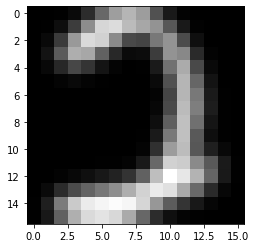

In [ ]:
# Percorrendo as imagens do loader de teste e pegando uma imagem unica

imagem = next(iter(testloader))[0][12].view(16,16)
plt.imshow(imagem, cmap='gray')

In [ ]:
imagem.shape

torch.Size([16, 16])

In [ ]:
# Formatando imagem para o shape requerido pelo pytorch

imagem = imagem.view(1, 1, 16, 16)
imagem.shape

torch.Size([1, 1, 16, 16])

In [ ]:
# Colocando a rede no modo eval e passando para gpu

net.eval()
imagem = imagem.to(device)

In [ ]:
# Realizando previsão

previsao = net.forward(imagem)

In [ ]:
# verificando respostas
# Estes valores são chamados de 'score'.

print(previsao)

tensor([[ 2.3449, -7.2210,  5.1320,  5.0924, -4.2536,  4.3392, -0.5167, -1.5365,
          1.5519, -2.9874]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
# Aplicando softmax nos scores para gerar as probabilidades

prob = F.softmax(previsao, dim=1)

print(prob)

tensor([[2.4559e-02, 1.7209e-06, 3.9868e-01, 3.8317e-01, 3.3459e-05, 1.8042e-01,
         1.4041e-03, 5.0644e-04, 1.1112e-02, 1.1868e-04]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


In [ ]:
# Selecionando apenas os resultados

prob = prob.cpu().detach().numpy()

print(prob)

[[2.45585963e-02 1.72085583e-06 3.98677558e-01 3.83170545e-01
  3.34589313e-05 1.80416778e-01 1.40407647e-03 5.06439246e-04
  1.11121610e-02 1.18684555e-04]]


In [ ]:
# verificando o resultado
labels = ["0","1","2","3","4","5","6","7","8","9"]

resultado = np.argmax(prob)

print(f'A classe predita é: {resultado}')
print('\n Classe: ' + labels[resultado])

A classe predita é: 2

 Classe: 2
